# 调整巩固充实提高

# 2025.03.21

1. 归一化奖励$$reward=\frac{reward-baseRevenue.mean}{baseRevenue.var}$$
归一化后，0出现的概率有所提升
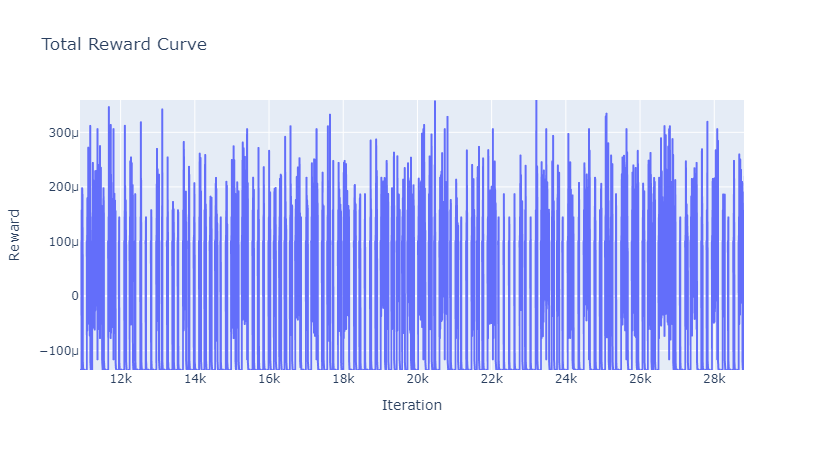
（此非total reward，而为time reward）

2. 打印actor.stat_dict()与critic.stat_dict()，未见有梯度消失情况
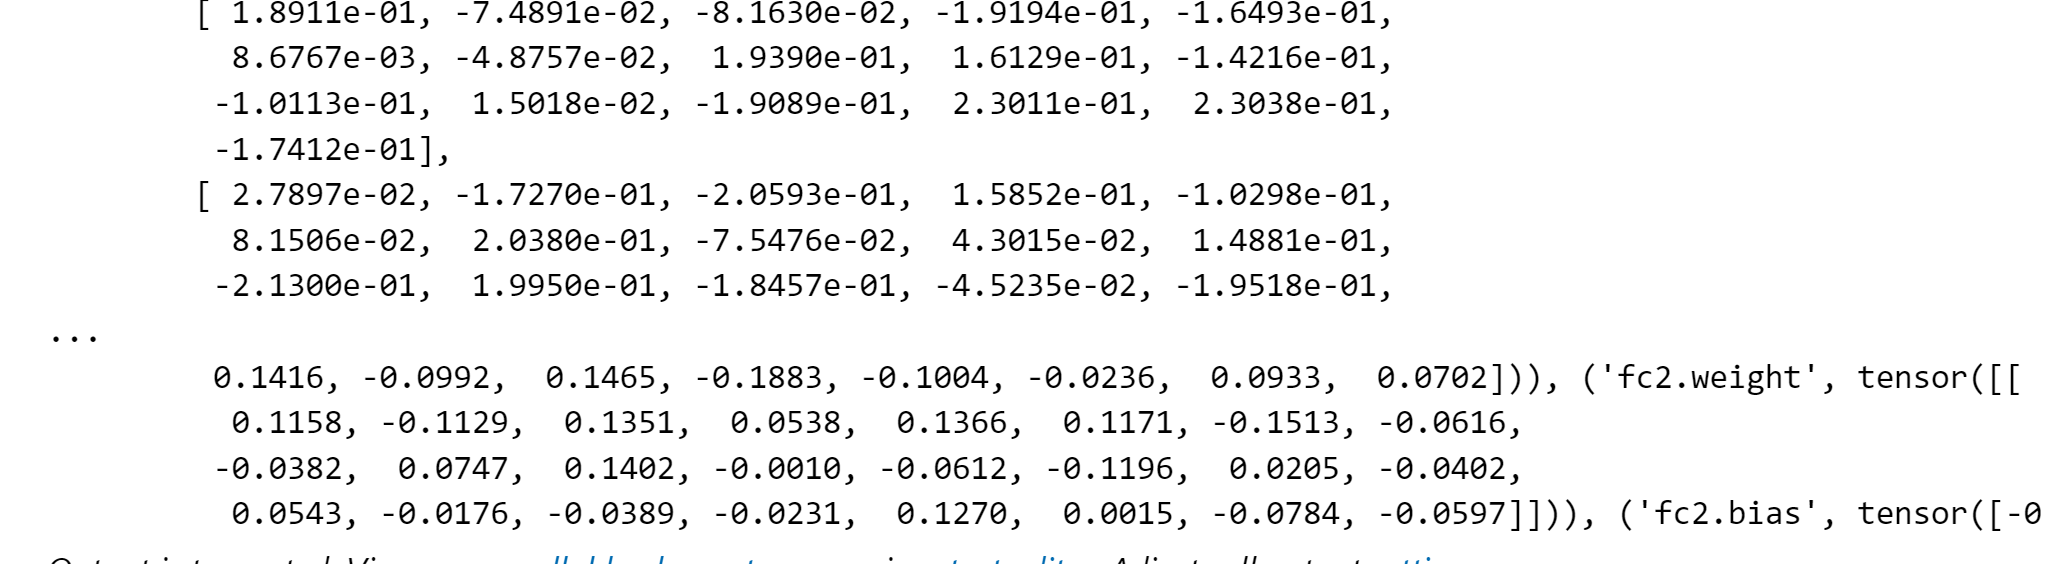

3. 不改变其他条件，仅降低问题规模，得到如下结果：
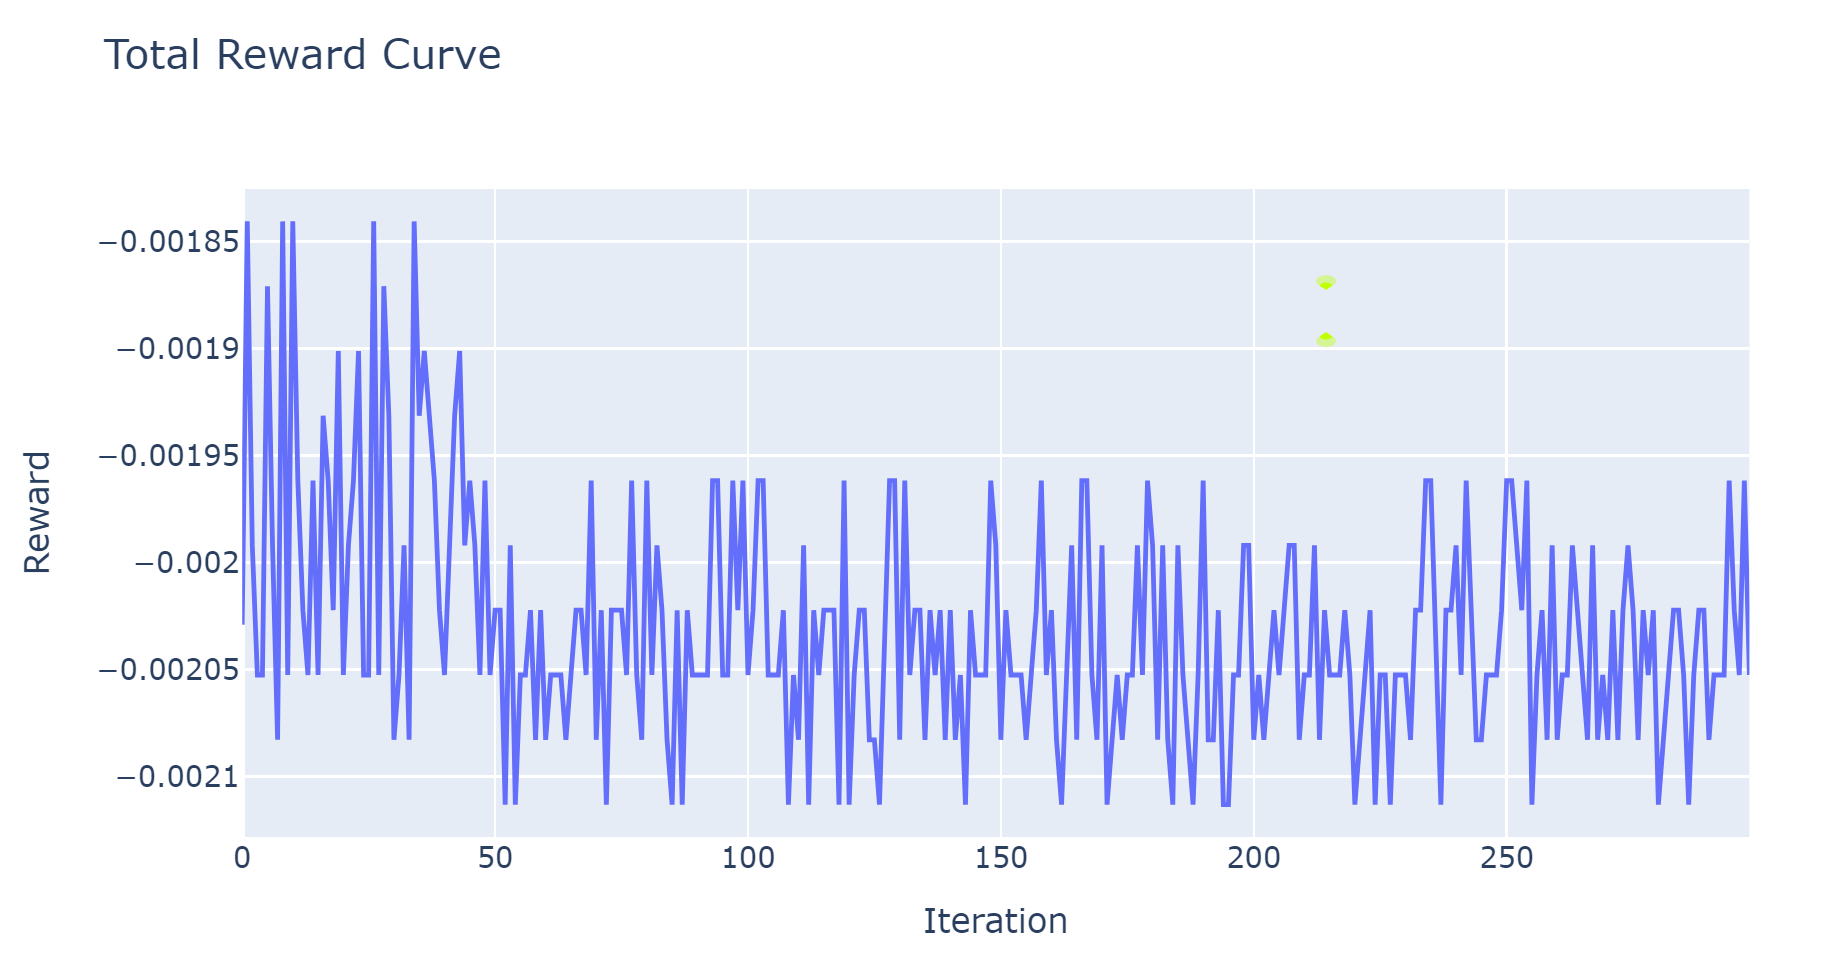

4. 今日提醒：tool_func中order_generator函数引用order_feasible_action不当，当改为list_str(G.get_intercity_path(*order.virtual_route()))，故在Lower_layer中有两处需更正

# 2025.03.23

1. 新增函数`vetor_order_detial()`，用于提供更为详细的可行城市信息；修改了`order.path_key`中的错误;修正了`Lower_Layer`不能调用`list_str()`的问题（循环`import`）
2. 将视频的帧率降低

# 2025.03.24

1. `feasible_binary_action`有处错误，每次循环加2，因有`range`与`j++`
2. 每当有最好解（0）时，下一次求解建立约束条件就会报错，在`Lower_Layer`中第145行，打印信息得出`order.matched`为`True`，这是不应该的。之前由于忘记删去`try`模块导致该问题一直没被发现。目前为解决，先写`env.cities_reload(city_node)`以排查初始化问题

# 2025.03.26

1. 先前为`city_node`诸属性设置`property`而无`setter`，实在多此一举，其中谬误如今才发觉。

# 2025.03.27

1. 将`mean`与`var`替换为全局最好的，结果不佳，没有好的提升

# 2025.03.28

1. 如果仅对好样本每n轮学一次，那么某种程度上可以确定下确界。
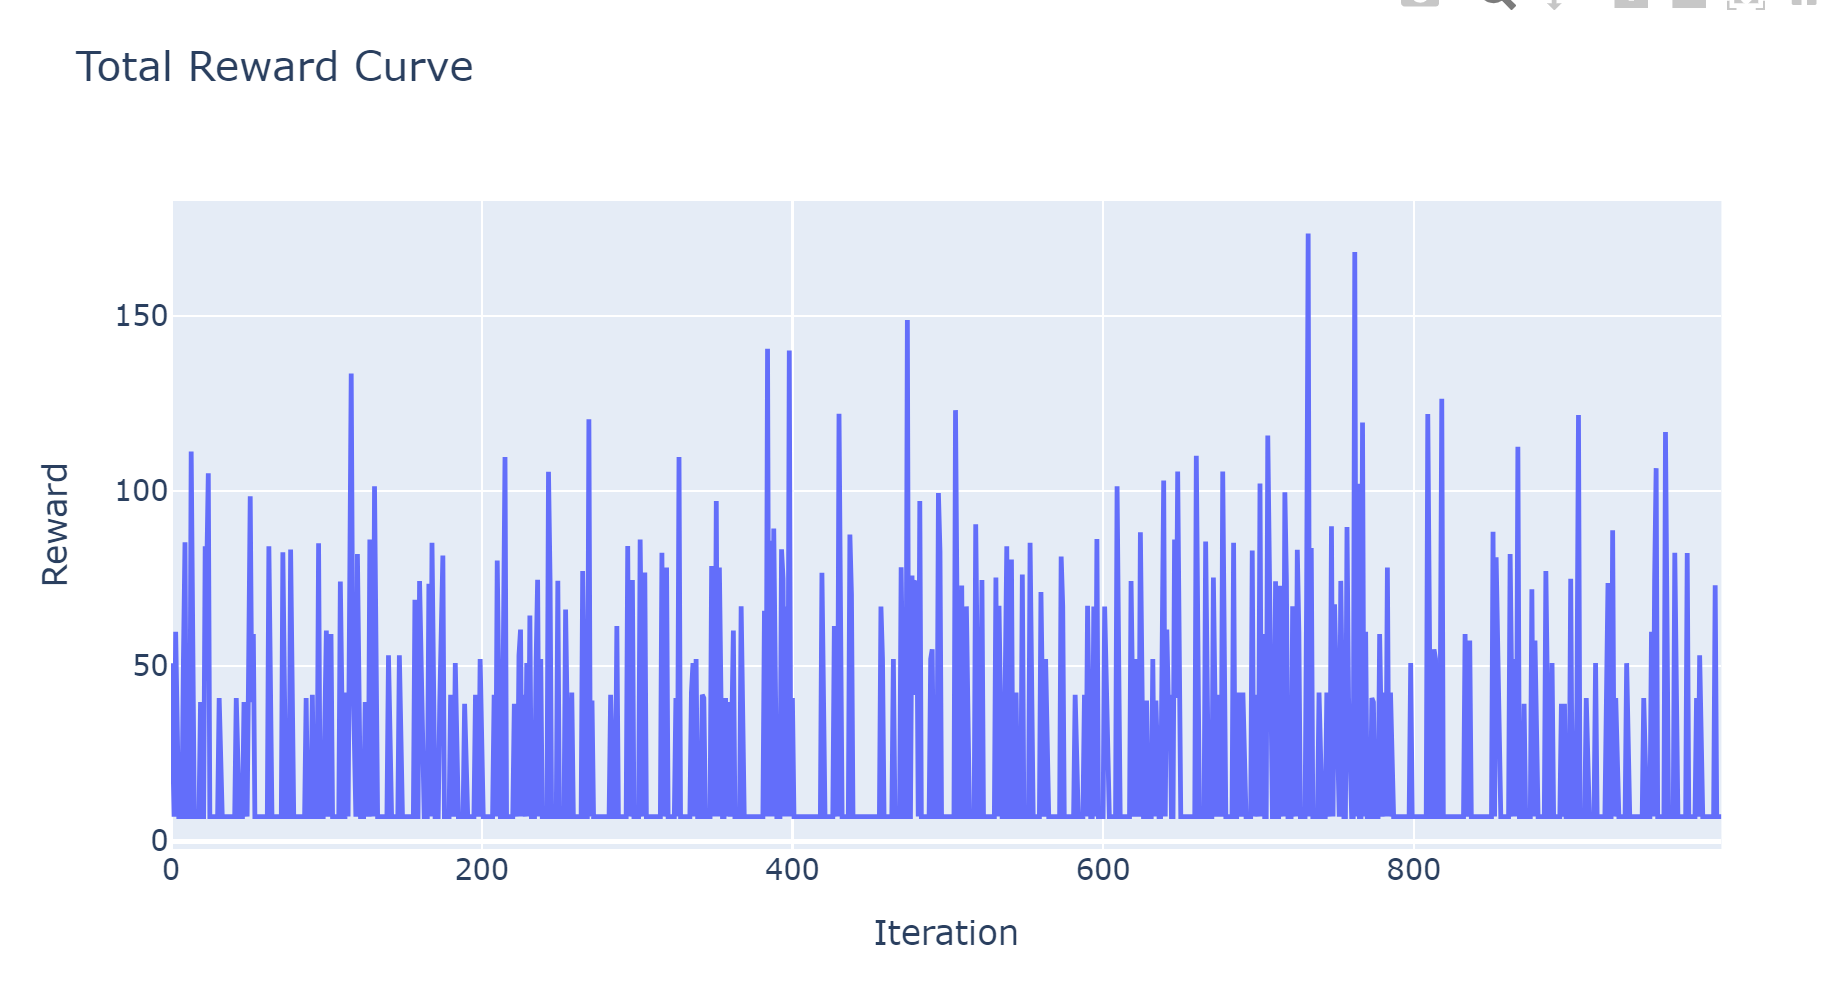

2.王兴兴等评论PPO:https://zhuanlan.zhihu.com/p/21131372654
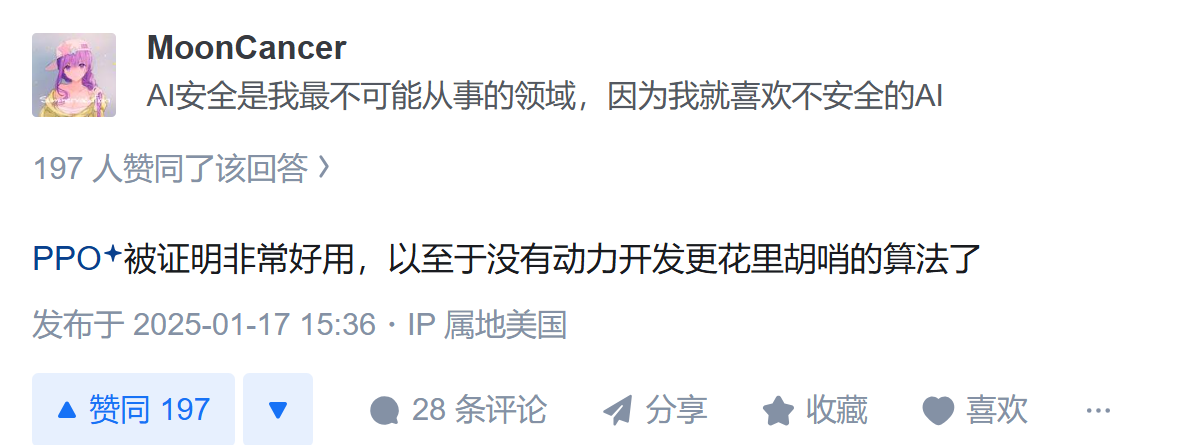
至少应该尝试PPO，因为目前还没有使用严格的模仿学习